# Simplest simulation of confidence reduction

- Two estimators
- Each one has a probability distribution
- They exchange their estimates
    - by the naive
    - by the conservative data exchange
- What if they repeated the exchange multiple times?
- What if the exchanged data gains some noises?



In [78]:
import random
import math
import matplotlib.pyplot as plt
import statistics
import numpy as np

## make two distributions

N: 1000
sum1: 1.0000000000000004
sum2: 0.9999676541896152


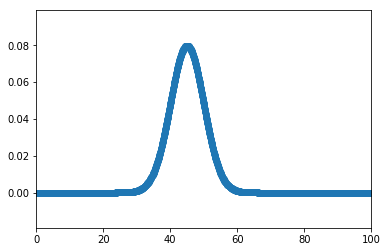

max at 45.0


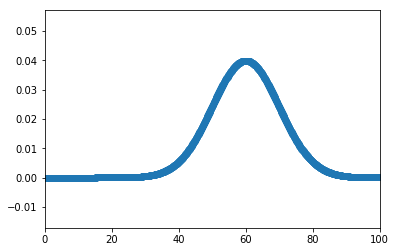

max at 60.0


In [79]:
x_max = 100
x_min = 0
dlt = 0.1
N = int((x_max-x_min)/dlt)
print('N: ' + str(N))
x_axis = [x_min + i * dlt for i in range(N)]

def p(x, mean, sigma):
    return math.exp(-0.5*(x - mean)**2 / sigma / sigma) / math.sqrt(2*math.pi*sigma*sigma)


dist1 = [p(x, 45, 5) for x in x_axis]
print('sum1: ' + str(sum(dist1)*dlt))
dist2 = [p(x, 60, 10) for x in x_axis]
print('sum2: ' + str(sum(dist2)*dlt))

plt.scatter(x_axis, dist1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(dist1)*dlt))
plt.scatter(x_axis, dist2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(dist2)*dlt))

# interaction functions

0.9999999999999987


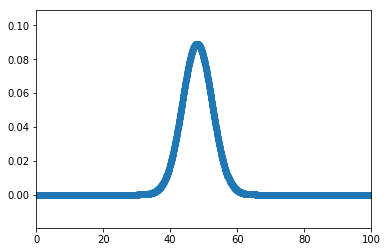

max at 48.0


In [80]:
def combine(p1, p2, off = 0):
    ans = []
    for i in range(len(p1)):
        if i + off < 0:
            ans.append(p1[i]*p2[0])
        elif len(p2) <= i + off:
            ans.append(p1[i]*p2[-1])
        else:
            ans.append(p1[i]*p2[i+off])
#     temp_min = -1
#     for i in range(len(ans)):
#         if ans[i] != 0 and (temp_min -1 or temp_min > ans[i]):
#             temp_min = ans[i]
#     for i in range(len(ans)):
#         if ans[i] == 0:
#             ans[i] = temp_min/1000.0
    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

def divide(p, omega):
    ans1 = []
    ans2 = []
    for i in range(len(p)):
        ans1.append(math.pow(p[i], omega))
        ans2.append(math.pow(p[i], 1-omega))
    total1 = sum(ans1)*dlt
    total2 = sum(ans2)*dlt
    for i in range(len(ans1)):
        ans1[i] /= total1
        ans2[i] /= total2
    return [ans1, ans2]

p_comb = combine(dist1, dist2)
print(sum(p_comb)*dlt)
plt.scatter(x_axis, p_comb)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p_comb)*dlt))
# p1, p2 = divide(p, 0.4)
# print(sum(p1)*dlt)
# print(sum(p2)*dlt)
# plt.scatter(x_axis, p1)
# plt.xlim(x_min, x_max)
# plt.show()
# plt.scatter(x_axis, p2)
# plt.xlim(x_min, x_max)
# plt.show()

# repeated interactions

In [81]:
n_interactions = 1000

## Naive

0.9999999999999798
0.9999999999999798


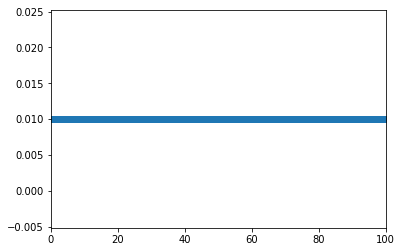

max at 0.0


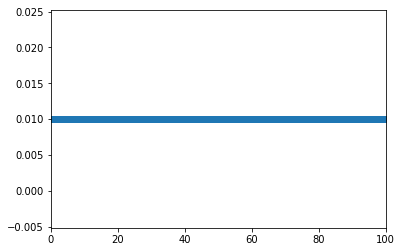

max at 0.0


In [82]:
p1 = list(dist1)
p2 = list(dist2)
for i in range(n_interactions):
    p1 = combine(p1, p2)
    p2 = list(p1)

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

# Conservative

1.0000000000000007
1.0000000000000007


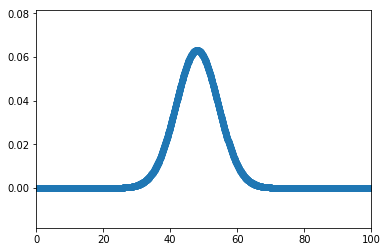

max at 48.0


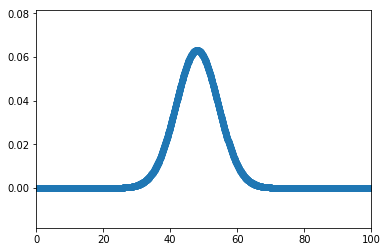

max at 48.0


In [83]:
p1 = list(dist1)
p2 = list(dist2)
omega = 0.9
for i in range(n_interactions):
    p1_omega, p1_1_omega = divide(p1, omega)
    p2_omega, p2_1_omega = divide(p2, omega)
    p1 = combine(p1_omega, p2_1_omega)
    p2 = combine(p2_omega, p1_1_omega)

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

# noises

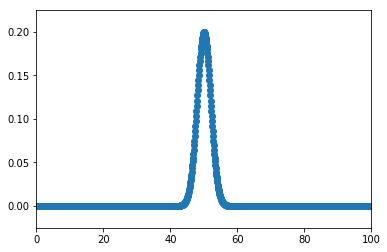

1.0


In [84]:
noise_sigma = 2
noise_mean = (x_min+x_max)/2.0
p_noise = [p(x, noise_mean, noise_sigma) for x in x_axis]
noise_mean_indx = len(p_noise)//2
plt.scatter(x_axis, p_noise)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p_noise)*dlt)



# Convolution

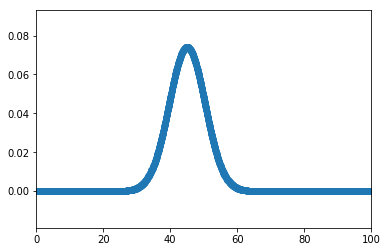

0.9999999999999987


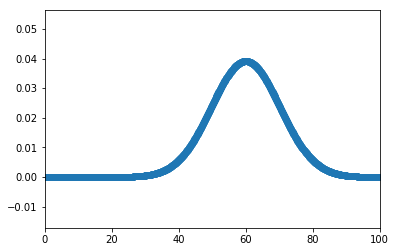

0.9999999999999997
noise: 48.28005973979171
off: -16 for 1000


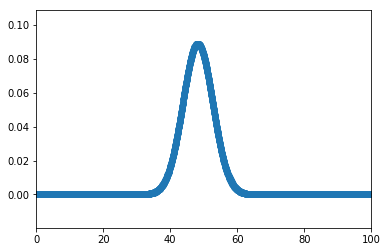

0.9999999999999984
max at 48.2


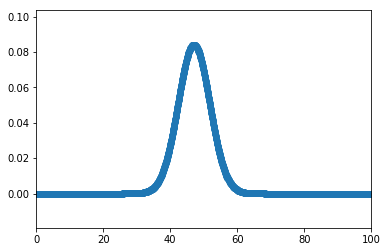

1.0000000000000002
max at 47.1


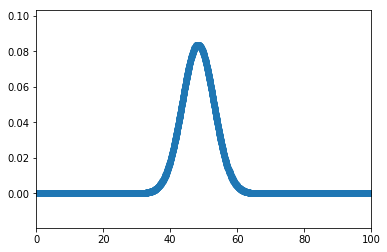

1.0000000000000038
max at 48.300000000000004


In [85]:
def conv(p1, p2, position):
    ans = [0] * len(p1)
    for i in range(len(p1)):
        for j in range(len(p2)):
            k = j - i + position
            if 0 <= k and k < len(p2):
                ans[i] += p1[j] * p2[k]
    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

p1_conv = conv(dist1, p_noise, noise_mean_indx)
plt.scatter(x_axis, p1_conv)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p1_conv)*dlt)
p2_conv = conv(dist2, p_noise, noise_mean_indx)
plt.scatter(x_axis, p2_conv)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p2_conv)*dlt)


noise = random.gauss((x_min+x_max)/2.0, noise_sigma)
print('noise: ' + str(noise))
print('off: ' + str(int((noise-noise_mean)/dlt+0.5)) + ' for ' + str(len(dist1)))

p1_comb = combine(dist1, p2_conv, int((noise-noise_mean)/dlt+0.5))
plt.scatter(x_axis, p1_comb)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p1_comb)*dlt)
print("max at " + str(np.argmax(p1_comb)*dlt))

p2_comb = combine(dist2, p1_conv, int(-(noise-noise_mean)/dlt+0.5))
plt.scatter(x_axis, p2_comb)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p2_comb)*dlt)
print("max at " + str(np.argmax(p2_comb)*dlt))

p_comb = combine(p1_conv, p2_conv)
plt.scatter(x_axis, p_comb)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p_comb)*dlt)
print("max at " + str(np.argmax(p_comb)*dlt))

# entropy

In [86]:
def entropy(p):
    ans = 0
    for i in range(len(p)):
        if p[i] > 0:
            ans -= p[i]*dlt * math.log2(p[i]*dlt)
    return ans

def D_KL(p,q):
    ans = 0
    for i in range(len(p)):
        ans += p[i]*dlt * math.log2(p[i]/q[i])
    return ans

def cross_entropy(p,q):
    return entropy(p) + D_KL(p,q)

# https://stats.stackexchange.com/questions/97938/calculate-the-kullback-leibler-divergence-in-practice
def D_CUSTOM(p, q):
    ans = 0
    for i in range(len(p)):
        if p[i] > 0 or q[i] > 0:
            ave = (p[i]+q[i])/2.0
            if p[i] > 0:
                ans += p[i]*dlt * math.log2(p[i]/ave)
            if q[i] > 0:
                ans += q[i]*dlt * math.log2(q[i]/ave)
    return ans/2.0

print('H(dist1): ' + str(entropy(dist1)))
print('H(dist2): ' + str(entropy(dist2)))
print('H(dist1;dist1): ' + str(cross_entropy(dist1, dist1)))
print('H(dist1;dist2): ' + str(cross_entropy(dist1, dist2)))
print('D_KL(dist1||dist1): ' + str(D_KL(dist1, dist1)))
print('D_KL(dist1||dist2): ' + str(D_KL(dist1, dist2)))

print('H(p_noise): ' + str(entropy(p_noise)))

H(dist1): 7.6909517749553515
H(dist2): 8.690277198943757
H(dist1;dist1): 7.6909517749553515
H(dist1;dist2): 9.772973055622074
D_KL(dist1||dist1): 0.0
D_KL(dist1||dist2): 2.0820212806667238
H(p_noise): 6.3690236800680085


# naive with noises

0 iterations done...
5 iterations done...
10 iterations done...
15 iterations done...
20 iterations done...
25 iterations done...
30 iterations done...
35 iterations done...
40 iterations done...
45 iterations done...
50 iterations done...
55 iterations done...
60 iterations done...
65 iterations done...
70 iterations done...
75 iterations done...
80 iterations done...
85 iterations done...
90 iterations done...
95 iterations done...
100 iterations done...
105 iterations done...
110 iterations done...
115 iterations done...
120 iterations done...
125 iterations done...
130 iterations done...
135 iterations done...
140 iterations done...
145 iterations done...
150 iterations done...
155 iterations done...
160 iterations done...
165 iterations done...
170 iterations done...
175 iterations done...
180 iterations done...
185 iterations done...
190 iterations done...
195 iterations done...
200 iterations done...
205 iterations done...
210 iterations done...
215 iterations done...
220 iterat

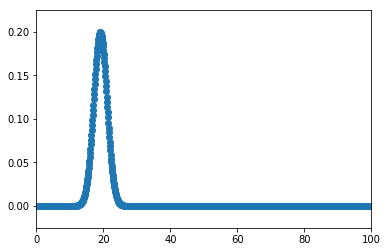

max at 19.1


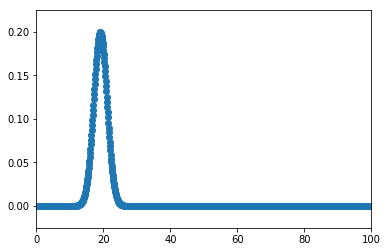

max at 19.1


In [87]:
p1 = list(dist1)
p2 = list(dist2)

H1 = [entropy(p1)]
H11 = [D_CUSTOM(dist1, p1)]
H2 = [entropy(p2)]
H22 = [D_CUSTOM(dist2, p2)]
MAP1 = [np.argmax(p1)*dlt]
MAP2 = [np.argmax(p2)*dlt]

for i in range(n_interactions):
    p1 = conv(p1, p_noise, noise_mean_indx)
    p2 = conv(p2, p_noise, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)
    p1 = combine(p1, p2, int((noise-noise_mean)/dlt+0.5))
    p2 = list(p1)
    
    H1 += [entropy(p1)]
    H11 += [D_CUSTOM(dist1, p1)]
    H2 += [entropy(p2)]
    H22 += [D_CUSTOM(dist2, p2)]
    MAP1 += [np.argmax(p1)*dlt]
    MAP2 += [np.argmax(p2)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p1)*dlt)
print(sum(p2)*dlt)

plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

min(H(p1)): 5.929985612980599


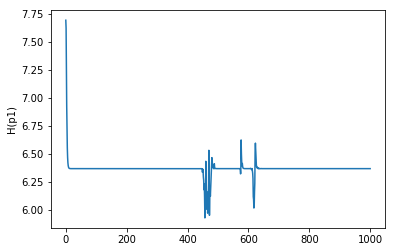

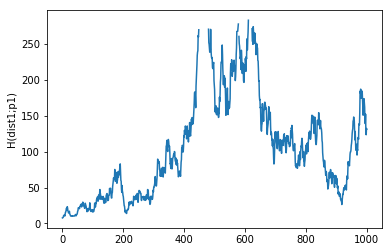

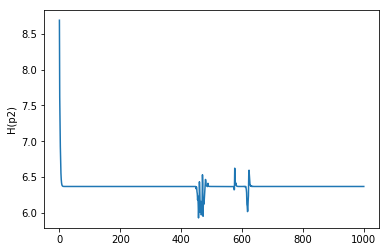

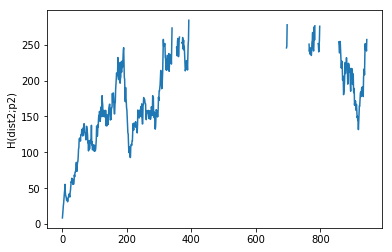

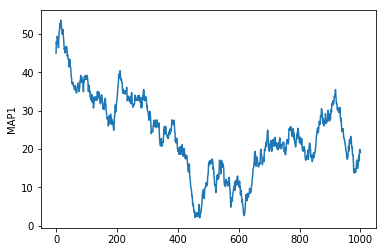

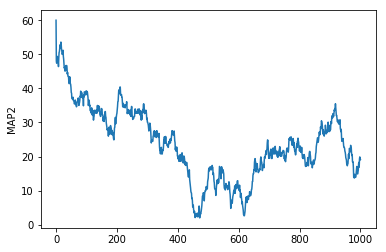

In [88]:
plt.plot(H1)
plt.ylabel('H(p1)')
print('min(H(p1)): ' + str(min(H1)))
plt.show()
plt.plot(H11)
plt.ylabel('D_CUSTOM(dist1;p1)')
plt.show()
plt.plot(H2)
plt.ylabel('H(p2)')
plt.show()
plt.plot(H22)
plt.ylabel('D_CUSTOM(dist2;p2)')
plt.show()
plt.plot(MAP1)
plt.ylabel('MAP1')
plt.show()
plt.plot(MAP2)
plt.ylabel('MAP2')
plt.show()

# Conservative with noises

0 iterations done...
5 iterations done...
10 iterations done...
15 iterations done...
20 iterations done...
25 iterations done...
30 iterations done...
35 iterations done...
40 iterations done...
45 iterations done...
50 iterations done...
55 iterations done...
60 iterations done...
65 iterations done...
70 iterations done...
75 iterations done...
80 iterations done...
85 iterations done...
90 iterations done...
95 iterations done...
100 iterations done...
105 iterations done...
110 iterations done...
115 iterations done...
120 iterations done...
125 iterations done...
130 iterations done...
135 iterations done...
140 iterations done...
145 iterations done...
150 iterations done...
155 iterations done...
160 iterations done...
165 iterations done...
170 iterations done...
175 iterations done...
180 iterations done...
185 iterations done...
190 iterations done...
195 iterations done...
200 iterations done...
205 iterations done...
210 iterations done...
215 iterations done...
220 iterat

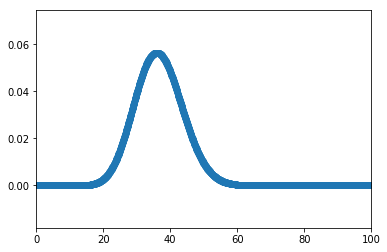

max at 35.9


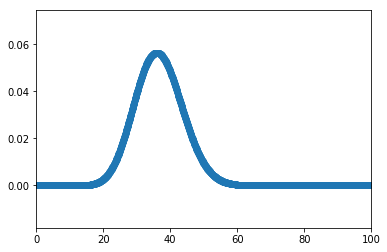

max at 35.9


In [89]:
p1 = list(dist1)
p2 = list(dist2)

H1 = [entropy(p1)]
H11 = [D_CUSTOM(dist1, p1)]
H2 = [entropy(p2)]
H22 = [D_CUSTOM(dist2, p2)]
MAP1 = [np.argmax(p1)*dlt]
MAP2 = [np.argmax(p2)*dlt]

omega = 0.9
for i in range(n_interactions):
    p1_omega, p1_1_omega = divide(p1, omega)
    p2_omega, p2_1_omega = divide(p2, omega)

    p1_to_pass = conv(p1_1_omega, p_noise, noise_mean_indx)
    p2_to_pass = conv(p2_1_omega, p_noise, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)

    p1 = combine(p1_omega, p2_to_pass, int((noise-noise_mean)/dlt+0.5))
    p2 = combine(p2_omega, p1_to_pass, int((noise-noise_mean)/dlt+0.5))

    H1 += [entropy(p1)]
    H11 += [D_CUSTOM(dist1, p1)]
    H2 += [entropy(p2)]
    H22 += [D_CUSTOM(dist2, p2)]
    MAP1 += [np.argmax(p1)*dlt]
    MAP2 += [np.argmax(p2)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

min(H(p1)): 7.6909517749553515


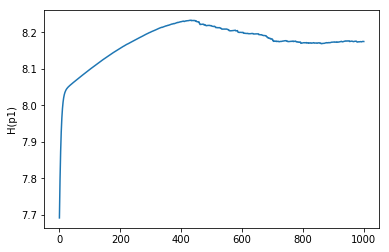

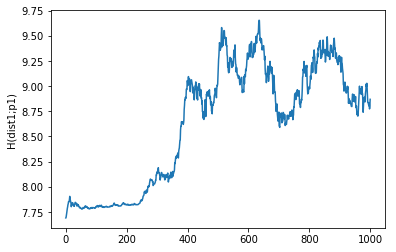

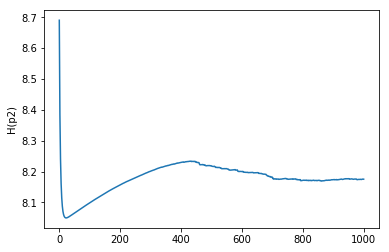

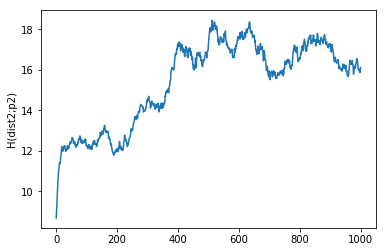

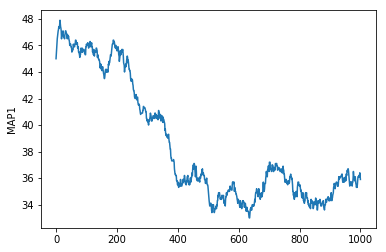

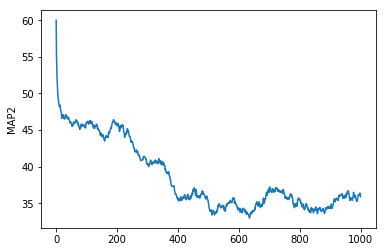

In [90]:
plt.plot(H1)
plt.ylabel('H(p1)')
print('min(H(p1)): ' + str(min(H1)))
plt.show()
plt.plot(H11)
plt.ylabel('D_CUSTOM(dist1;p1)')
plt.show()
plt.plot(H2)
plt.ylabel('H(p2)')
plt.show()
plt.plot(H22)
plt.ylabel('D_CUSTOM(dist2;p2)')
plt.show()
plt.plot(MAP1)
plt.ylabel('MAP1')
plt.show()
plt.plot(MAP2)
plt.ylabel('MAP2')
plt.show()

# Conservative with noise (diving noise)

In [91]:
p1 = list(dist1)
p2 = list(dist2)
H1 = [entropy(p1)]
H11 = [D_CUSTOM(dist1, p1)]
H2 = [entropy(p2)]
H22 = [D_CUSTOM(dist2, p2)]
MAP1 = [np.argmax(p1)*dlt]
MAP2 = [np.argmax(p2)*dlt]

omega = 0.9
for i in range(n_interactions):
    p1_omega, p1_1_omega = divide(p1, omega)
    p2_omega, p2_1_omega = divide(p2, omega)
    
    p_noise_div, p_noise_div2 = divide(p_noise, 1 - omega)
    p1_to_pass = conv(p1_1_omega, p_noise_div, noise_mean_indx)
    p2_to_pass = conv(p2_1_omega, p_noise_div, noise_mean_indx)
#     p1_to_pass = conv(p1, p_noise, noise_mean_indx)
#     p1_to_discard, p1_to_pass = divide(p1_to_pass, omega)
#     p2_to_pass = conv(p2, p_noise, noise_mean_indx)
#     p2_to_discard, p2_to_pass = divide(p2_to_pass, omega)
    noise = random.gauss(noise_mean, noise_sigma)

    p1 = combine(p1_omega, p2_to_pass, int((noise-noise_mean)/dlt+0.5))
    p2 = combine(p2_omega, p1_to_pass, int((noise-noise_mean)/dlt+0.5))

    H1 += [entropy(p1)]
    H11 += [D_CUSTOM(dist1, p1)]
    H2 += [entropy(p2)]
    H22 += [D_CUSTOM(dist2, p2)]
    MAP1 += [np.argmax(p1)*dlt]
    MAP2 += [np.argmax(p2)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

0 iterations done...
5 iterations done...
10 iterations done...
15 iterations done...
20 iterations done...
25 iterations done...
30 iterations done...
35 iterations done...
40 iterations done...
45 iterations done...
50 iterations done...
55 iterations done...
60 iterations done...
65 iterations done...
70 iterations done...
75 iterations done...
80 iterations done...
85 iterations done...
90 iterations done...
95 iterations done...
100 iterations done...
105 iterations done...
110 iterations done...
115 iterations done...
120 iterations done...
125 iterations done...
130 iterations done...
135 iterations done...
140 iterations done...
145 iterations done...
150 iterations done...
155 iterations done...
160 iterations done...
165 iterations done...
170 iterations done...
175 iterations done...
180 iterations done...
185 iterations done...
190 iterations done...
195 iterations done...
200 iterations done...
205 iterations done...
210 iterations done...
215 iterations done...
220 iterat

KeyboardInterrupt: 

In [ ]:
plt.plot(H1)
plt.ylabel('H(p1)')
print('min(H(p1)): ' + str(min(H1)))
plt.show()
plt.plot(H11)
plt.ylabel('D_CUSTOM(dist1;p1)')
plt.show()
plt.plot(H2)
plt.ylabel('H(p2)')
plt.show()
plt.plot(H22)
plt.ylabel('D_CUSTOM(dist2;p2)')
plt.show()
plt.plot(MAP1)
plt.ylabel('MAP1')
plt.show()
plt.plot(MAP2)
plt.ylabel('MAP2')
plt.show()

# Conservative with noise (but noise is ignored for est)

In [ ]:
p1 = list(dist1)
p2 = list(dist2)
H1 = [entropy(p1)]
H11 = [D_CUSTOM(dist1, p1)]
H2 = [entropy(p2)]
H22 = [D_CUSTOM(dist2, p2)]
MAP1 = [np.argmax(p1)*dlt]
MAP2 = [np.argmax(p2)*dlt]

omega = 0.9
for i in range(n_interactions):
    p1_omega, p1_1_omega = divide(p1, omega)
    p2_omega, p2_1_omega = divide(p2, omega)
    
    
    p1_to_pass = p1_1_omega #conv(p1_1_omega, p_noise2, noise_mean_indx)
    p2_to_pass = p2_1_omega #conv(p2_1_omega, p_noise2, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)

    p1 = combine(p1_omega, p2_to_pass, int((noise-noise_mean)/dlt+0.5))
    p2 = combine(p2_omega, p1_to_pass, int((noise-noise_mean)/dlt+0.5))

    H1 += [entropy(p1)]
    H11 += [D_CUSTOM(dist1, p1)]
    H2 += [entropy(p2)]
    H22 += [D_CUSTOM(dist2, p2)]
    MAP1 += [np.argmax(p1)*dlt]
    MAP2 += [np.argmax(p2)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

In [ ]:
plt.plot(H1)
plt.ylabel('H(p1)')
print('min(H(p1)): ' + str(min(H1)))
plt.show()
plt.plot(H11)
plt.ylabel('D_CUSTOM(dist1;p1)')
plt.show()
plt.plot(H2)
plt.ylabel('H(p2)')
plt.show()
plt.plot(H22)
plt.ylabel('D_CUSTOM(dist2;p2)')
plt.show()
plt.plot(MAP1)
plt.ylabel('MAP1')
plt.show()
plt.plot(MAP2)
plt.ylabel('MAP2')
plt.show()